In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"
dir_TNGcube = dir_repo+"/TNGcube"

sys.path.append(dir_KLens)
from KLtool import *

sys.path.append(dir_TNGcube)
from TNGcube import *

sys.path.append(dir_BinnedFit)
from binnedFit_utilities import lambda_to_velocity, velocity_to_lambda

Populating the interactive namespace from numpy and matplotlib


In [2]:
subhalo = pickle.load(open('../notebooks/subhalo_35.pkl', 'rb'))

In [3]:
pars = {}
pars['spinR'] = [0, 0, -1]
pars['sini'] = 1.
pars['theta_int'] = 0. #np.pi/6.
pars['g1'] = 0.
pars['g2'] = 0.
pars['redshift'] = 0.3
pars['psfFWHM'] = 0.5
pars['sigma_thermal'] = 16.  # [unit: km/s]

pars['slitAngles'] = [0., np.pi/2]

lambda_cen0 = ParametersTNG.lineLambda0['Halpha']
#lambda_cen0 = (lineLambda0['OIIa']+lineLambda0['OIIb'])/2.

pars['lambda_cen'] = (1+pars['redshift'])*lambda_cen0

In [4]:
pars['expTime'] = 30.*60.              # [unit: sec]
pars['area'] = 3.14 * (1000./2.)**2    # telescope area [unit: cm2]

pars['ref_SDSS_lineL'] = 3.*1e-17      # [unit: erg/s/Angstrom/cm2]    # * u.erg/u.second/u.Angstrom/u.cm**2

fiber_SDSS = np.pi * 1.5**2.           # fiber size [unit: arcsec2]
refSDSSspec = pars['ref_SDSS_lineL'] * u.erg/u.second/u.Angstrom/u.cm**2
refSDSSspec = refSDSSspec.to(u.erg/u.second/u.nm/u.cm**2)
print('reference SDSS fiber spec:', refSDSSspec)

pars['lineflux'] = refSDSSspec.value / fiber_SDSS  # [unit: erg/s/cm2/nm/arcsec2]
pars['lineflux']

pars['ngrid'] = 256

reference SDSS fiber spec: 2.9999999999999994e-16 erg / (cm2 nm s)


In [5]:
mock = TNGmock(pars=pars, subhalo=subhalo, auto_tune=True, par_meta=None)

residual PA = 5.169 deg. (auto-corrected)
residual center offset: (-0.037, 0.036) [arcsec] (auto-corrected)
residual center offset: (-0.151, 0.147) [ckpc] (auto-corrected)


In [6]:
dataInfo = mock.gen_mock_data(noise_mode=0)

/Users/hhg/Research/kinematic_lensing/repo/TNGcube/notebooks/../../TNGcube/TNGcube.py:835: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc601db450>)

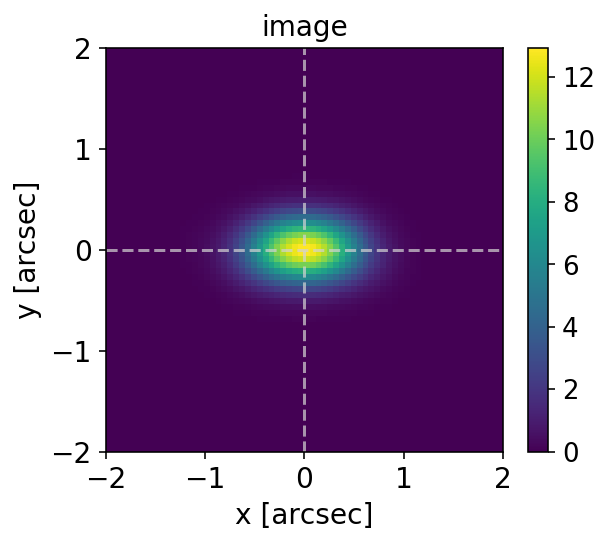

In [7]:
dataInfo['image'].display(xlim=[-2., 2.])

/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


time cost in gaussFit_spec2D: 0.32915592193603516 (secs)


/Users/hhg/Research/kinematic_lensing/repo/TNGcube/notebooks/../../TNGcube/../BinnedFit/spec2D.py:216: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


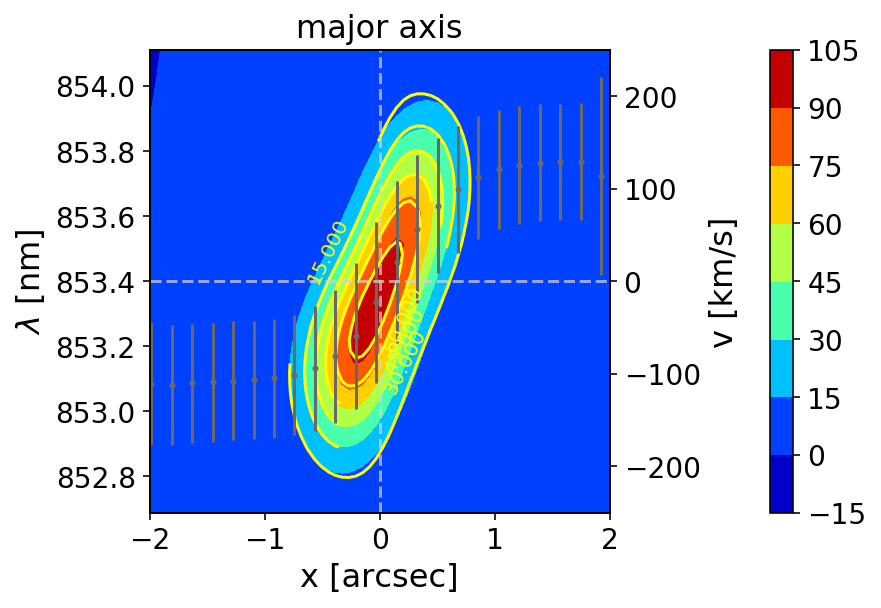

In [8]:
model_major = dataInfo['spec'][0].GF.model
fig, ax = dataInfo['spec'][0].display(xlim=[-2., 2], vlim=[-250, 250], mark_fit=True, model=model_major, title='major axis')

time cost in gaussFit_spec2D: 0.3904588222503662 (secs)


(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc89258890>)

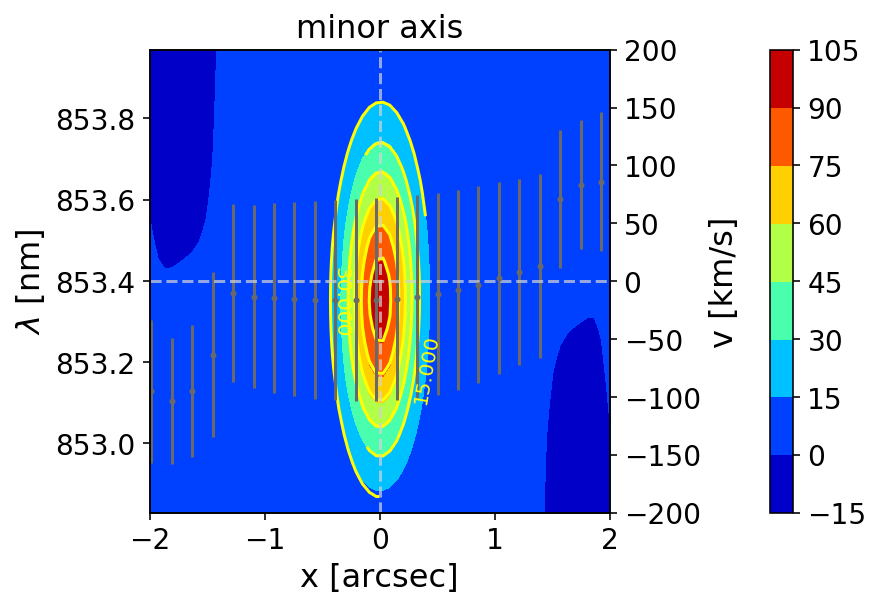

In [9]:
model_minor = dataInfo['spec'][1].GF.model
dataInfo['spec'][1].display(xlim=[-2., 2], vlim=[-200, 200], mark_fit=True, model=model_minor, title='minor axis')

In [10]:
spec2D_sky = Spec2D(array=mock.sky.spec2D_arr, array_var=mock.sky.spec2D_arr, 
                    spaceGrid=mock.specCube.spaceGrid, lambdaGrid=mock.specCube.lambdaGrid, 
                    line_species=dataInfo['line_species'], z=mock.z, auto_cut=False)

(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc68347310>)

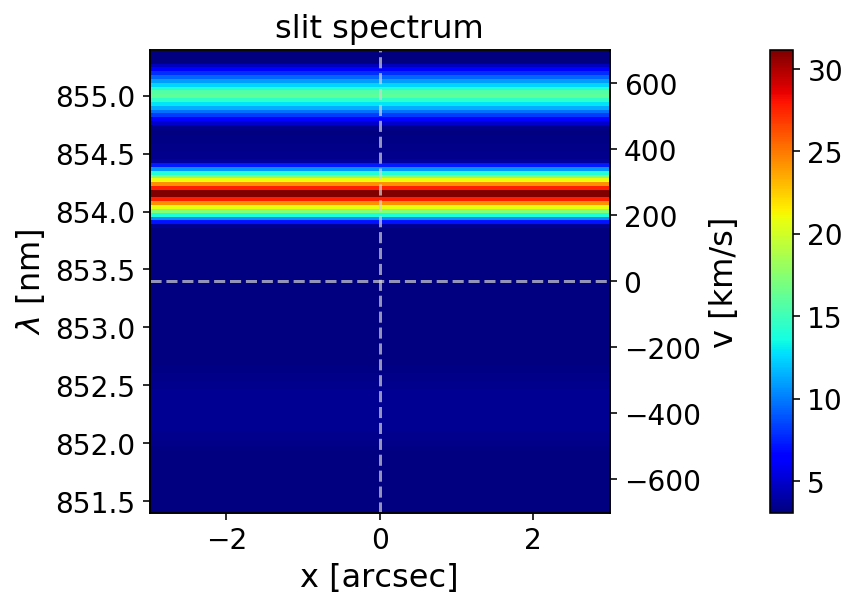

In [11]:
spec2D_sky.display(xlim=[-3.,3.])

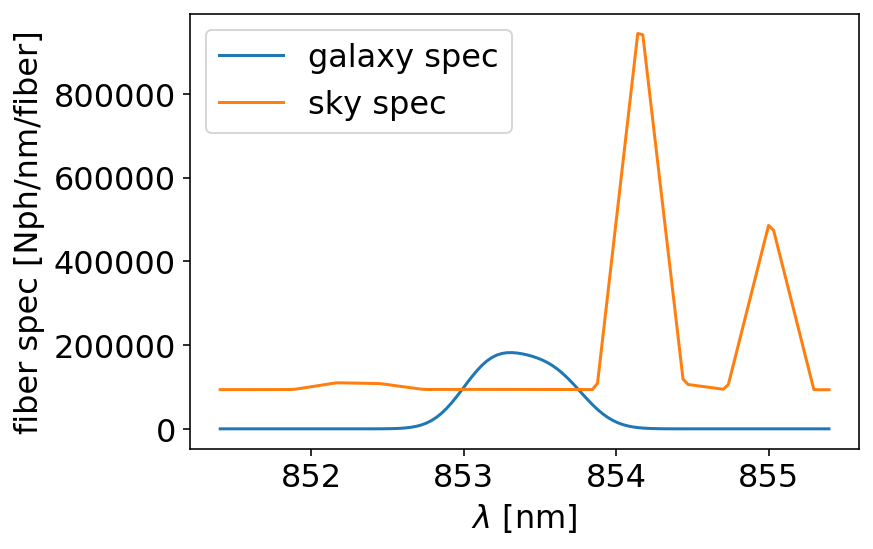

In [12]:
spec1D = Fiber(mock.specCube).get_spectrum(fiberR=1.5)  # SDSS fiber Radius=1.5 arcsec

spec1D_sky = Fiber(mock.sky.skyCube).get_spectrum(fiberR=1.5)  

plt.plot(mock.Pars.lambdaGrid, spec1D, label='galaxy spec')
plt.plot(mock.Pars.lambdaGrid, spec1D_sky, label='sky spec')
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('fiber spec [Nph/nm/fiber]')
plt.legend()

Text(0, 0.5, 'fiber spec [erg/s/cm2/Ang/fiber]')

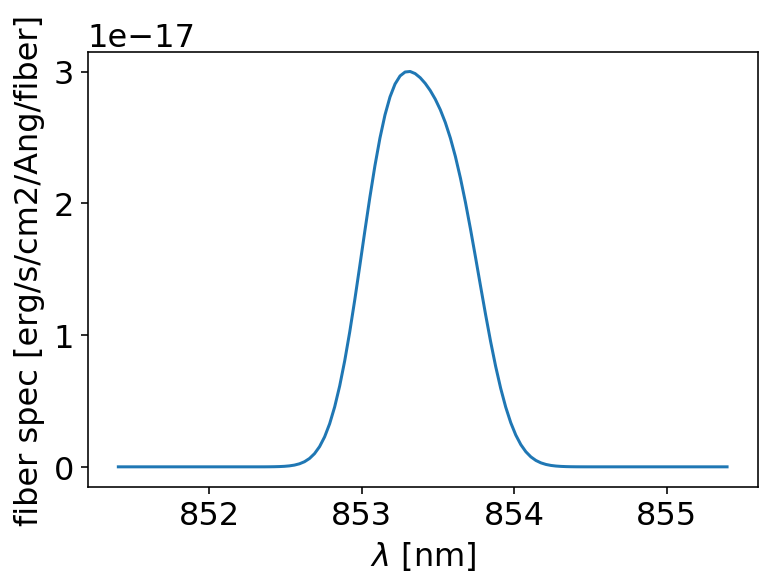

In [13]:
spec1D_uSDSS = Fiber(mock.specCube).get_spectrum(fiberR=1.5, expTime=mock.Pars.expTime, area=mock.Pars.area)

spec1DSky_uSDSS = Fiber(mock.sky.skyCube).get_spectrum(fiberR=1.5, expTime=mock.Pars.expTime, area=mock.Pars.area)  


plt.plot(mock.Pars.lambdaGrid, spec1D_uSDSS, label='galaxy spec')
#plt.plot(mock.Pars.lambdaGrid, spec1DSky_uSDSS, label='sky spec')
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('fiber spec [erg/s/cm2/Ang/fiber]')